# Travail d'Etude et de Recherche 

## Présenté par MULAPI TITA Ketsia

##### (Ce text est repris de kaggle)

Il s'agit de la légendaire compétition Titanic ML - le meilleur et premier défi pour vous de plonger dans les compétitions de ML et de vous familiariser avec le fonctionnement de la plate-forme Kaggle.

Le concours est simple : utilisez l'apprentissage automatique pour créer un modèle qui prédit quels passagers ont survécu au naufrage du Titanic.

Bien qu'il y ait eu une part de chance dans la survie, il semble que certains groupes de personnes aient plus de chances de survivre que d'autres.

Dans ce défi, nous vous demandons de créer un modèle prédictif qui répond à la question : « quels types de personnes avaient le plus de chances de survivre ? » en utilisant les données des passagers (c'est-à-dire le nom, l'âge, le sexe, la classe socio-économique, etc.).

# Librairies

In [546]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import seaborn as sn

In [547]:
df_gender = pd.read_csv("gender_submission.csv")
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

# Questions ?

Dans ce défi, nous devons construire un modèle prédictif afin d'être capable de répondre aux questions suivantes: 

«Quels types de personnes étaient plus susceptibles de survivre? Qui ont survécu ou pas ?» 

en utilisant les données sur les passagers (c'est-à-dire nom, âge, sexe, classe socio-économique, etc.).

ils étaient 1502 passagers mort sur 2224 parmis les quels il y a aussi d'autres passagers qui étaient moins succeptibles de survivre que d'autres.

Retenons donc que notre principale tâche consiste à prédire si un passager a survécu face au naufrage du Titanic ou non.

Pour chaque élément de l'ensemble de test, nous allons prédire une valeur 0 ou 1 pour la variable.

cette variable étant discrète, nous partirons sur une approche de classification.

In [6]:
2224-1502

722

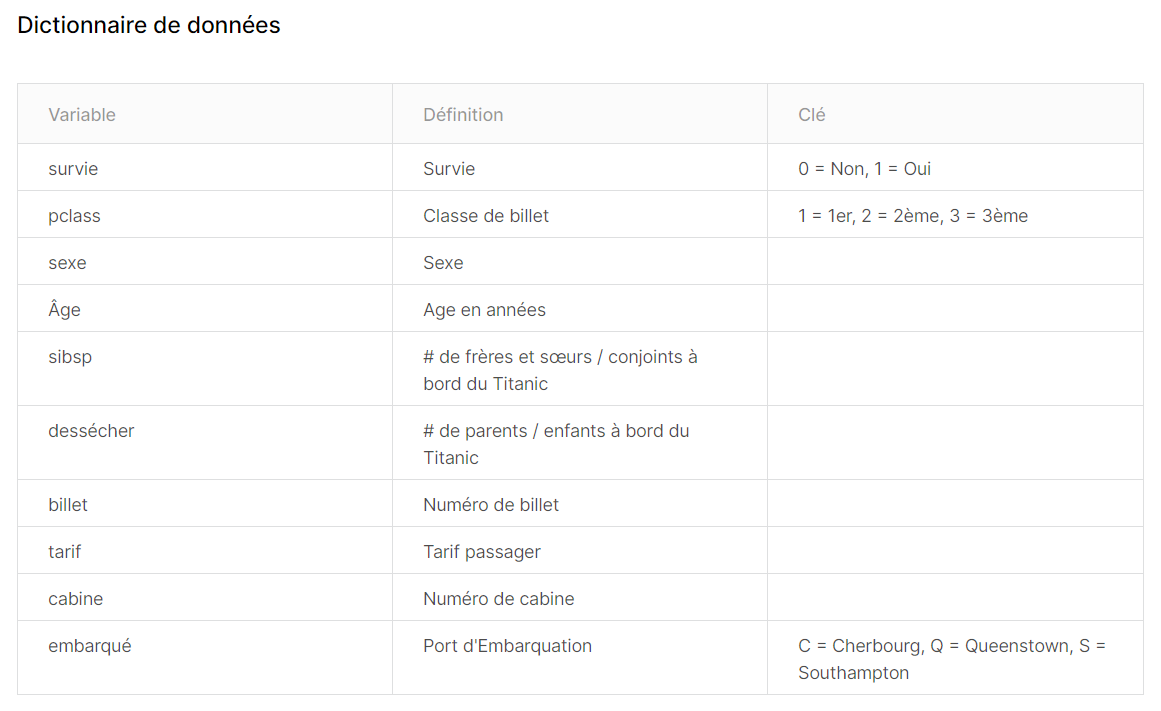

déssécher = parch, ticket = billet, tarif = fare

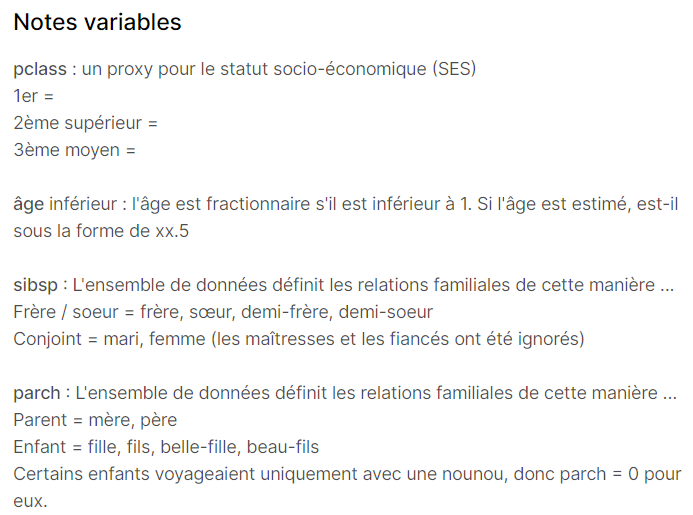

# Data pre-processing

In [7]:
df_gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [8]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [545]:
df_test.PassengerId[df_test.PassengerId==1044]

152    1044
Name: PassengerId, dtype: int64

In [9]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


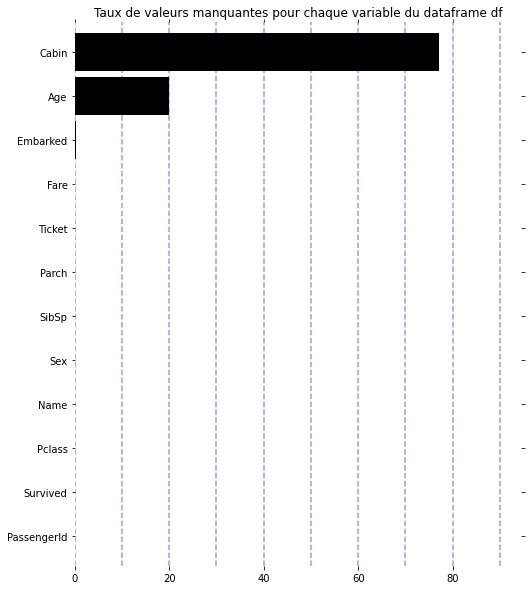

In [587]:
# cette fonction se trouve plus bas
# on observer les valeurs manquantes
observer(df_train)

In [14]:
df_train.info() #il y ' a des valeurs manquantes pour l'age, Cabin et Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
891-714 #Age

177

In [589]:
891-204 #Cabin

687

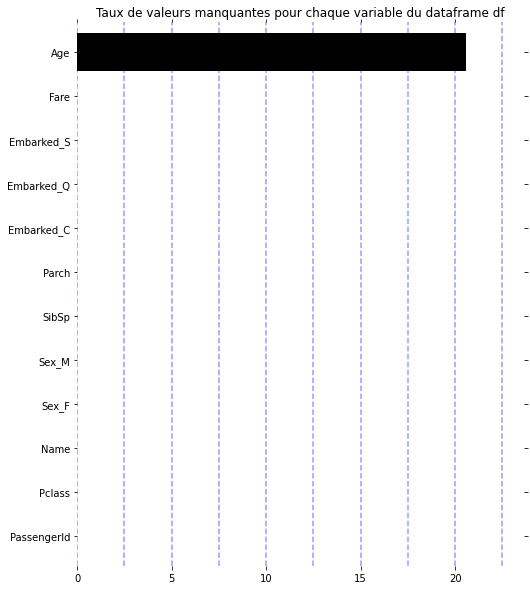

In [588]:
observer(df_test)

In [10]:
df_gender.info() #aucune valeur null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [11]:
df_test.info() #il y ' a des valeurs manquantes pour l'age, fare, Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
418-332

86

In [13]:
418-91

327

On met le df_test de coté, on se concentre sur le df_train

### études statistiques

In [16]:
df_train.describe() # Uniquement des variables numériques

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


    - la moyenne de survivant ou non est de 0.383 ce qui rapproche la réalité à plus de mort 
                que de vies.
    - En moyenne, la moyenne des classes fréquentées est largement supérieur à la 2ème classe donc, 
                on a plus de passager entre la 2e et la 3è classse
    - L'age : 
                a) moyen des passagers était de 29.6 ans, 
                b) l'écart qui existe entre tous les autres ages et l'age moyen est de 14.5 ans 
                c) le plus jeune passager avait quelques mois (0.42 ans)
                d) le plus vieux passager avait 80 ans
    - Les tarifs :
                a) Le tarif moyen était de 32.2 livres
                b) L'écart type entre chaque tarif et le tarif moyen était de 49.6 livres
                c) Le tarif minimal était de zro (certainement le cas des bébés, des enfants d'un 
                   certain âge, etc.)
                d) Le tarif le plus haut était de 512.32 livre.

Histogramme des variables numériques

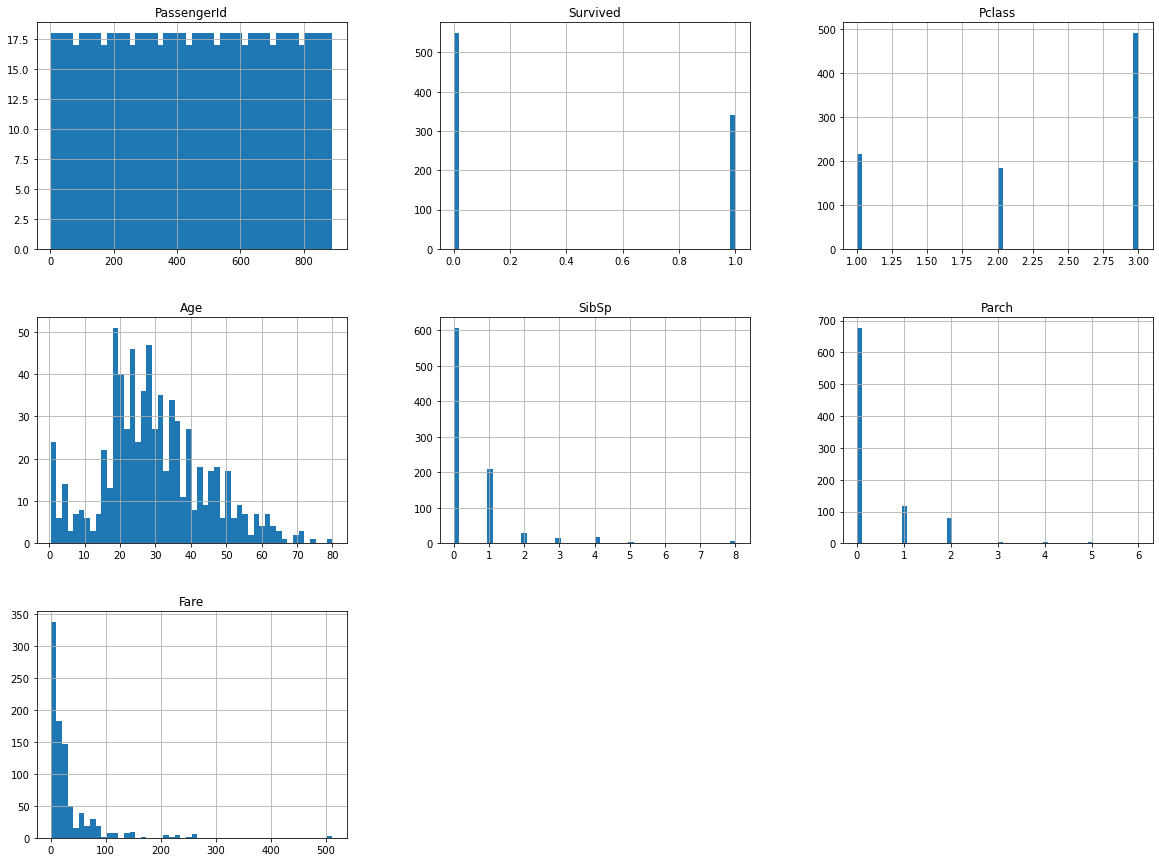

In [17]:
%matplotlib inline
df_train.hist(bins=50, figsize=(20,15))
plt.show()

Constat :

    1) Le PassangerId suit une loi uniforme ça veut dire que les valeurs de cette variable évolue de de façon crissantes
    2) Le Survived suit une loi Binomiale car les valeurs ne sont comprises que entre 0 et 1, un individu qui survie au naufrage a l'indice 1, 0 sinon.
    3) Le Pclass 
    4) L'age suit une loi normale sauf que ici, elle est très asymétrique à gauche il existe donc plusieurs valeurs supérieur à l'age moyenne et très peu qui sont inférieurs
    5) Le SibSp
    6) Le désséchement (Parch)
    7) Le tarif (Fare) 

### Recherche des corrélations

array([[<AxesSubplot:xlabel='PassengerId', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Survived', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Pclass', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Age', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='SibSp', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Parch', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Fare', ylabel='PassengerId'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='

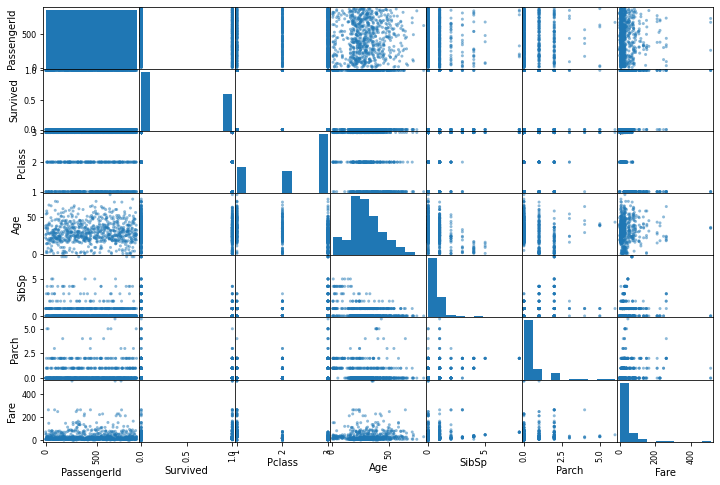

In [18]:
attributes = ["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare"]
pd.plotting.scatter_matrix(df_train[attributes], figsize=(12,8))

#### Connaîtres les valeurs disctincts des variables

## On peut s'intérresser aux éléments suivants :
    
    - Pclass : les individus qui ont le plus survécu sont de quelles classes ? ou encore ceux qui, 
               sont mort ?
    - Sex : pour savoir si ce sont les hommes ou les femmes qui sont le plus morts ou vivant ?
    - Age : les survivants ou non, Sont-ils en grande partie majeurs ou mineurs ?
    - Embarked : Le plus d'emmbarquement a eu lieu où ? les survivent sont en majorité d'où ? les 
                 morts sont en majorités d'où ?
    - Survived : Y'a-t-il plus de survivant que de non survivant ? Prédire le test data, découvrir de 
                 nouvelles informations 

### les individus qui ont le plus survécu sont de quelles classes ?

In [19]:
df_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Il y'avait plus de 3 ème classe, 2 ème classe et moins de 1 ère classe.

In [20]:
IndividusC3 = df_train[df_train.Pclass==3]
SurvivantsC3 = IndividusC3[IndividusC3.Survived==1]
SurvivantsC3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 2 to 875
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  119 non-null    int64  
 1   Survived     119 non-null    int64  
 2   Pclass       119 non-null    int64  
 3   Name         119 non-null    object 
 4   Sex          119 non-null    object 
 5   Age          85 non-null     float64
 6   SibSp        119 non-null    int64  
 7   Parch        119 non-null    int64  
 8   Ticket       119 non-null    object 
 9   Fare         119 non-null    float64
 10  Cabin        6 non-null      object 
 11  Embarked     119 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 12.1+ KB


Dans nos données d'entraînement il n'y avait que 119 personnes ayant reservés une place en Trosiième (3e) classe qui ont pu survivre.

In [21]:
IndividusC3.Sex.value_counts()

male      347
female    144
Name: Sex, dtype: int64

In [22]:
SurvivantsC3.Sex.value_counts()

female    72
male      47
Name: Sex, dtype: int64

On peut conclure que, sur 491 individus de la 3 ème classes, il n'y a que 119 ont survécu,  les hommes de la 3e classes ont moins survécu que les femmes en raisons de 47 survivants face à 72 surviventes respectivement.

In [23]:
IndividusC2 = df_train[df_train.Pclass==2]
SurvivantsC2 = IndividusC2[IndividusC2.Survived==1]
SurvivantsC2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 9 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Survived     87 non-null     int64  
 2   Pclass       87 non-null     int64  
 3   Name         87 non-null     object 
 4   Sex          87 non-null     object 
 5   Age          83 non-null     float64
 6   SibSp        87 non-null     int64  
 7   Parch        87 non-null     int64  
 8   Ticket       87 non-null     object 
 9   Fare         87 non-null     float64
 10  Cabin        13 non-null     object 
 11  Embarked     87 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 8.8+ KB


87 individus de la 2ème classe ont survécus, 

In [24]:
IndividusC2.Sex.value_counts()

male      108
female     76
Name: Sex, dtype: int64

In [25]:
SurvivantsC2.Sex.value_counts()

female    70
male      17
Name: Sex, dtype: int64

In [26]:
(87*100)/184

47.28260869565217

Sur 184 Individus de la classe 2,  87 ont survécus soit 47.2% des individus de la classe 2, ici aussi il y'a moins d'hommes que de femmes qui ont survécu soit 17 survivants contre 70 survivantes respectivements.

In [27]:
IndividusC1 = df_train[df_train.Pclass==1]
SurvivantsC1 = IndividusC1[IndividusC1.Survived==1]
SurvivantsC1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  136 non-null    int64  
 1   Survived     136 non-null    int64  
 2   Pclass       136 non-null    int64  
 3   Name         136 non-null    object 
 4   Sex          136 non-null    object 
 5   Age          122 non-null    float64
 6   SibSp        136 non-null    int64  
 7   Parch        136 non-null    int64  
 8   Ticket       136 non-null    object 
 9   Fare         136 non-null    float64
 10  Cabin        117 non-null    object 
 11  Embarked     134 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 13.8+ KB


In [28]:
IndividusC1.Sex.value_counts()

male      122
female     94
Name: Sex, dtype: int64

In [29]:
SurvivantsC1.Sex.value_counts()

female    91
male      45
Name: Sex, dtype: int64

Sur 216 Individus de la classe 2, 136 ont survécus, ici aussi il y'a moins d'hommes que de femmes qui ont survécu soit 45 survivants contre 91 survivantes respectivements.

##### En conclusion :

Les individus de la première classe du naufrage du Titanic dans ce jeu d'entrainement, ont plus survient que les autres. En effet, sur 119+136+87=342 individus qui ont survécus, il y'a la première classe en première position, la trosième classe, suivit de la deuxième classe.

Dans les trois classes, les femmes ont plus survécue que les hommes alors que le nombre d'hommes était de loin supérieur au nombre de femmes.

### les survivants ou non, Sont-ils en grande partie majeurs ou mineurs ?

In [30]:
len(SurvivantsC1[SurvivantsC1.Age>=18])

111

In [31]:
len(SurvivantsC2[SurvivantsC2.Age>=18])

62

In [32]:
len(SurvivantsC3[SurvivantsC3.Age>=18])

56

##### En conclusion :

    Dans la première classe, ce sont les adultes qui ont survécu le plus
    Dans la deuxième classe, ce sont les adultes qui ont survécu le plus
    Dans la troisième classe, ce sont les adultes qui ont survécu le plus
    
Donc en bref, les majeurs ont lus survécus que les mineurs.

### Où ont eu lieu le plius d'embarquement

In [33]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

le plus d'embarquement dans l'ordre ci-après : Southampton, Cherbourg, Queenstown

# Partie Features engineering : 

- Suppression du ticket et du nom, 
- encodage du sexe, 
- supprimer la colonne Cabine, 
- les 2 lignes manquantes de Embarked, 
- modifier les lignes du DF qui possède des 'NaN' à la colonne de l'age.

In [34]:
def observer(df_):
    size = df_.shape
    nan_values = df_.isna().sum()

    nan_values = nan_values.sort_values(ascending=True)*100/size[0]

    ax = nan_values.plot(kind='barh', 
                         figsize=(8, 10), 
                         color='#000000',
                         zorder=2,
                         width=0.85)

    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.tick_params(axis="both", 
                   which="both", 
                   bottom="off", 
                   top="off", 
                   labelbottom="on", 
                   left="off", 
                   right="off", 
                   labelleft="on")
    ax.set_title("Taux de valeurs manquantes pour chaque variable du dataframe df")
    vals = ax.get_xticks()

    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='blue', zorder=1)

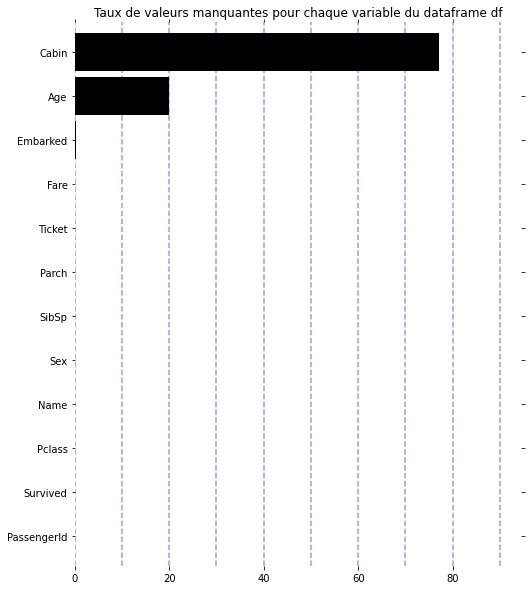

In [35]:
observer(df_train)

### 0) Suppression des 2 valeurs manquantes dans Embarked ainsi que des colonnes PassengerId, Ticket, et du nom

#### 0.1) Embarquement 

In [36]:
ListeIndexE=df_train[df_train.Embarked.isna()].index
df_train.drop(ListeIndexE, inplace=True)
df_train[df_train.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### 0.2) Ticket, Name et PassengerID

In [37]:
df = df_train.loc[:, df_train.columns != 'Ticket']
df = df.loc[:, df.columns != 'Name']
#df = df.loc[:, df.columns != 'PassengerId']
pd.set_option('display.max_rows',df.shape[0]-1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


### 1) Encodage : Embarked, Sex

In [38]:
features = ["Sex","Embarked"]
encoded_var = pd.get_dummies(df[features])

In [39]:
encoded_var

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [40]:
df = df.loc[:, df.columns != 'Sex']
df = df.loc[:, df.columns != 'Embarked']
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.0,1,0,7.2500,NaN
1,2,1,1,38.0,1,0,71.2833,C85
2,3,1,3,26.0,0,0,7.9250,NaN
3,4,1,1,35.0,1,0,53.1000,C123
4,5,0,3,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,NaN
887,888,1,1,19.0,0,0,30.0000,B42
888,889,0,3,NaN,1,2,23.4500,NaN
889,890,1,1,26.0,0,0,30.0000,C148


In [41]:
df.insert(3, "Sex_F", encoded_var.Sex_female)
df.insert(4, "Sex_M", encoded_var.Sex_male)
df.insert(9, "Embarked_C", encoded_var.Embarked_C)
df.insert(10, "Embarked_Q", encoded_var.Embarked_Q)
df.insert(11, "Embarked_S", encoded_var.Embarked_S)
df

,PassengerId,Survived,Pclass,Sex_F,Sex_M,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin
0,1,0,3,0,1,22.0,1,0,7.2500,0,0,1,NaN
1,2,1,1,1,0,38.0,1,0,71.2833,1,0,0,C85
2,3,1,3,1,0,26.0,0,0,7.9250,0,0,1,NaN
3,4,1,1,1,0,35.0,1,0,53.1000,0,0,1,C123
4,5,0,3,0,1,35.0,0,0,8.0500,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,27.0,0,0,13.0000,0,0,1,NaN
887,888,1,1,1,0,19.0,0,0,30.0000,0,0,1,B42
888,889,0,3,1,0,NaN,1,2,23.4500,0,0,1,NaN
889,890,1,1,0,1,26.0,0,0,30.0000,1,0,0,C148


### 2) Cabine

nous allons supprimer les cabines car il y'a trop d'information manquantes et de ce fait, on ne peut pas se proposer de les remplacer par des valeurs médianes, moyennes, etc.

In [42]:
df_train_final = df.drop(["Cabin"], axis=1)
df_train_final

,PassengerId,Survived,Pclass,Sex_F,Sex_M,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,27.0,0,0,13.0000,0,0,1
887,888,1,1,1,0,19.0,0,0,30.0000,0,0,1
888,889,0,3,1,0,NaN,1,2,23.4500,0,0,1
889,890,1,1,0,1,26.0,0,0,30.0000,1,0,0


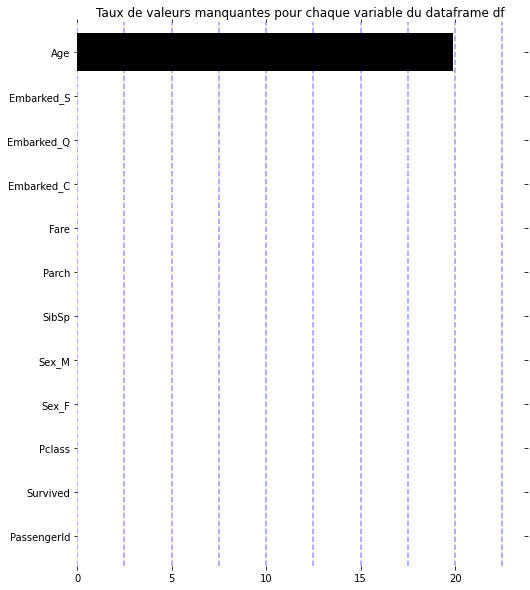

In [43]:
observer(df_train_final)

### 3) Modifier les lignes  d'occurences n'ayant aucune valeurs au niveau de l'age.

In [44]:
pd.set_option('display.max_rows',df_train_final.shape[0]-1)
#df_train_final.Age.value_counts()

In [45]:
df_train_final.Age[888]

nan

In [46]:
df_train_final.Age=df_train_final.Age.astype("float64")

In [47]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex_F        889 non-null    uint8  
 4   Sex_M        889 non-null    uint8  
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
 9   Embarked_C   889 non-null    uint8  
 10  Embarked_Q   889 non-null    uint8  
 11  Embarked_S   889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 99.9 KB


In [48]:
#pd.set_option('display.max_rows',df_train_final.shape[0]-1)
#df_train_final[df_train_final.Age.isna()]

In [49]:
(177*100)/891

19.865319865319865

In [50]:
len(df_train_final[df_train_final.Age.isna() & df_train_final.Survived==1])

52

In [51]:
177-52

125

In [52]:
ListeIndex=df_train_final[df_train_final.Age.isna()].index

In [53]:
ListeIndex

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [54]:
def recherche_hyper_params(X_train, y_train, X_test, y_test):
    # Set the parameters by cross-validation
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                         'C': [1, 10, 100, 1000]},
                        {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

    scores = ['precision', 'recall']

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(
            SVC(), tuned_parameters, scoring='%s_macro' % score
        )
        clf.fit(df_train_final.drop(["Survived","Name", "Sex", "Ticket", "Embarked" ], axis=1) , df_train_final.Survived)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        #print("Detailed classification report:")
        #print()
        #print("The model is trained on the full development set.")
        #print("The scores are computed on the full evaluation set.")
        #print()
        y_pred = clf.predict(X_test)
        print(y_pred)
        #print()

    # Note the problem is too easy: the hyperparameter plateau is too flat and the
    # output model is the same for precision and recall with ties in quality.

In [55]:
def Imputation(df,constraint):    

    df_copy = df.loc[:, df.columns != 'Name']

    # X_test dépourvu de la colonne Age on cherche à prédire leurs ages
    X_Age_test = df_copy[df_copy["Age"].isna()==True]
    X_Age_test = X_Age_test.loc[:, X_Age_test.columns != 'Age']


    # X_train avec age et age != nan : les individus qui ont un age
    X_Age_train = df_copy[df_copy["Age"].isna()!=True]

    # y_Train
    y_Age_train = pd.DataFrame(X_Age_train["Age"])    
    
    if(constraint):
        survivants = pd.DataFrame(df_copy.Survived)
        X_Age_test = X_Age_test.loc[:, X_Age_test.columns != 'Survived']
        X_Age_train = X_Age_train.loc[:, X_Age_train.columns != 'Survived']

    # 
    #X_Age_train = X_Age_train.loc[:, X_Age_train.columns != 'PassengerId']
    X_Age_train = X_Age_train.loc[:, X_Age_train.columns != 'Age']

    print(X_Age_test.info())
    print(X_Age_train.info())
    print(y_Age_train.info())

    # création du modèle et entraînement du modèle
    model = tree.DecisionTreeRegressor(random_state=0).fit(X_Age_train, y_Age_train)

    # f1_score
    score = model.score(X_Age_train, y_Age_train)
    print("la metric R-squared est : ", score)

    #
    #model = tree.DecisionTreeRegressor(random_state=0)
    #score = cross_val_score(model, X_Age_train, y_Age_train, cv=10)
    #print("la metric f1_score d'apprentissage avec validation croisée est : ",score)
    #model_2.fit(X_Age_train,y_Age_train)

    y=model.predict(X_Age_test)
    
    X_Age_test.insert(2, "Age", y)
    X_Age_train.insert(2, "Age", y_Age_train)
    df_rec = X_Age_train.combine_first(other=X_Age_test) 
    
    if(constraint):
        df_rec.insert(0, "Survived", survivants)
        
    if(df_train.PassengerId.value_counts().all()==df_rec.PassengerId.value_counts().all()):
        df_rec.info()
        print("OK!")    
    
    return y, model, df_rec

In [626]:
y, model, rec = Imputation(df_train_final,True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  177 non-null    int64  
 1   Pclass       177 non-null    int64  
 2   Sex_F        177 non-null    uint8  
 3   Sex_M        177 non-null    uint8  
 4   SibSp        177 non-null    int64  
 5   Parch        177 non-null    int64  
 6   Fare         177 non-null    float64
 7   Embarked_C   177 non-null    uint8  
 8   Embarked_Q   177 non-null    uint8  
 9   Embarked_S   177 non-null    uint8  
dtypes: float64(1), int64(4), uint8(5)
memory usage: 9.2 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Sex_F        712 non-null    uint8  
 3   Sex_M 

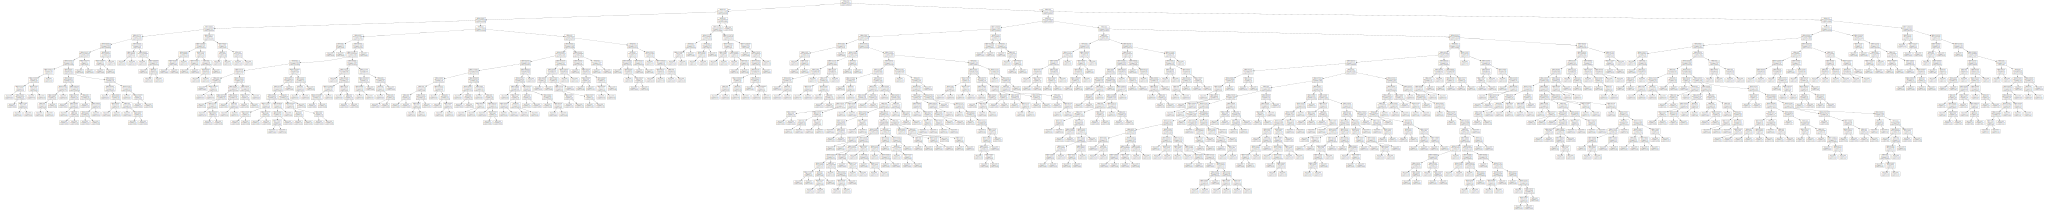

In [57]:
# exportation de la structure de l'arbre dans un fichier .dot
dotFile = open("file1.dot", "w")

# Viusaliseur en ligne
tree.export_graphviz(model, out_file=dotFile)
dotFile.close()

# Visualisation
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data)
graph

In [58]:
y

array([19.  , 55.  , 14.  , 28.5 , 15.  , 28.  , 31.  , 15.  , 28.5 ,
       28.  , 21.  , 26.  , 16.  , 32.  , 28.  , 40.  ,  0.83, 28.  ,
       24.  , 16.  , 24.  , 29.  , 28.  , 26.  , 19.  , 22.  , 70.5 ,
       26.  , 34.  , 45.5 , 17.  ,  1.  , 32.  , 58.  , 24.  , 16.  ,
       30.  , 71.  , 19.  , 65.  , 16.  ,  1.  , 65.  , 36.  , 24.  ,
       21.  , 14.5 , 19.  , 30.  , 26.  , 65.  , 22.  , 45.5 , 22.  ,
       42.  , 40.  , 40.  , 45.5 , 22.  , 28.  , 30.  , 19.  , 30.  ,
       16.  , 22.  , 17.  , 27.  , 24.  , 45.  , 30.  , 22.  , 22.  ,
       28.  , 14.  , 22.  , 35.  , 29.  , 21.  , 24.  , 29.  , 19.  ,
       31.  , 20.  , 29.  , 21.  , 29.  , 22.  , 38.  , 11.  , 34.  ,
       49.  , 29.  , 34.  , 48.  , 21.  , 21.  , 51.  , 48.  , 24.  ,
       11.  , 19.  , 19.  , 21.  , 36.  , 21.  , 26.  , 22.  , 22.  ,
       40.  , 22.  ,  7.  , 19.  , 28.  , 40.5 , 42.  , 40.5 , 16.  ,
       22.  , 22.  , 21.  , 17.  , 17.  , 22.  , 17.  , 18.  , 47.  ,
       30.  , 36.  ,

In [59]:
df = rec

### 3) Correlation en chiffre

In [60]:
#matrice de corrélation
df.dropna(inplace=False).corr()

,Survived,PassengerId,Pclass,Age,Sex_F,Sex_M,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.005028,-0.335549,-0.087363,0.541585,-0.541585,-0.034040,0.083151,0.255290,0.169966,0.004536,-0.151777
PassengerId,-0.005028,1.000000,-0.035330,0.022945,-0.043136,0.043136,-0.057686,-0.001657,0.012703,-0.001208,-0.033694,0.022269
Pclass,-0.335549,-0.035330,1.000000,-0.372001,-0.127741,0.127741,0.081656,0.016824,-0.548193,-0.245733,0.220558,0.076466
Age,-0.087363,0.022945,-0.372001,1.000000,-0.131840,0.131840,-0.291731,-0.199153,0.092064,0.024797,-0.033094,-0.000894
Sex_F,0.541585,-0.043136,-0.127741,-0.131840,1.000000,-1.000000,0.116348,0.247508,0.179958,0.084520,0.075217,-0.121405
Sex_M,-0.541585,0.043136,0.127741,0.131840,-1.000000,1.000000,-0.116348,-0.247508,-0.179958,-0.084520,-0.075217,0.121405
SibSp,-0.034040,-0.057686,0.081656,-0.291731,0.116348,-0.116348,1.000000,0.414542,0.160887,-0.060074,-0.026692,0.069438
Parch,0.083151,-0.001657,0.016824,-0.199153,0.247508,-0.247508,0.414542,1.000000,0.217532,-0.011588,-0.081585,0.061512
Fare,0.255290,0.012703,-0.548193,0.092064,0.179958,-0.179958,0.160887,0.217532,1.000000,0.270731,-0.116684,-0.163758
Embarked_C,0.169966,-0.001208,-0.245733,0.024797,0.084520,-0.084520,-0.060074,-0.011588,0.270731,1.000000,-0.148646,-0.782613


In [61]:
df.describe()

,Survived,PassengerId,Pclass,Age,Sex_F,Sex_M,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,446.000000,2.311586,29.278403,0.350956,0.649044,0.524184,0.382452,32.096681,0.188976,0.086614,0.724409
std,0.486260,256.998173,0.834700,14.199591,0.477538,0.477538,1.103705,0.806761,49.697504,0.391710,0.281427,0.447063
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,224.000000,2.000000,20.000000,0.000000,0.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,446.000000,3.000000,28.000000,0.000000,1.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,668.000000,3.000000,37.000000,1.000000,1.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,891.000000,3.000000,80.000000,1.000000,1.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [62]:
#pd.set_option('display.max_rows',df_train_final.shape[0]-1)

In [63]:
df_train_final2 = df
df_train_final2

,Survived,PassengerId,Pclass,Age,Sex_F,Sex_M,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,1.0,3.0,22.0,0.0,1.0,1.0,0.0,7.2500,0.0,0.0,1.0
1,1,2.0,1.0,38.0,1.0,0.0,1.0,0.0,71.2833,1.0,0.0,0.0
2,1,3.0,3.0,26.0,1.0,0.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1,4.0,1.0,35.0,1.0,0.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,0,5.0,3.0,35.0,0.0,1.0,0.0,0.0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,887.0,2.0,27.0,0.0,1.0,0.0,0.0,13.0000,0.0,0.0,1.0
887,1,888.0,1.0,19.0,1.0,0.0,0.0,0.0,30.0000,0.0,0.0,1.0
888,0,889.0,3.0,4.0,1.0,0.0,1.0,2.0,23.4500,0.0,0.0,1.0
889,1,890.0,1.0,26.0,0.0,1.0,0.0,0.0,30.0000,1.0,0.0,0.0


In [592]:
df_train_final2.describe()

,Survived,PassengerId,Pclass,Age,Sex_F,Sex_M,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,446.000000,2.311586,29.278403,0.350956,0.649044,0.524184,0.382452,32.096681,0.188976,0.086614,0.724409
std,0.486260,256.998173,0.834700,14.199591,0.477538,0.477538,1.103705,0.806761,49.697504,0.391710,0.281427,0.447063
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,224.000000,2.000000,20.000000,0.000000,0.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,446.000000,3.000000,28.000000,0.000000,1.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,668.000000,3.000000,37.000000,1.000000,1.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,891.000000,3.000000,80.000000,1.000000,1.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


###  Préparer le df_test :

In [126]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [127]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Je ramène le jeu de test à la même échelle (colonnes) que le data_train !!!

- Supprimer Cabin
- Dans Fare, remplacer Nan par la valeur moyenne
- Modifier le Sex et Embarked en faisant un OneHot encoded
- Supprimer le Ticket
- Pour l'Age remplacer par remplacer

In [548]:
df_test = df_test.loc[:, df_test.columns != 'Cabin']

In [549]:
df_test[df_test.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [550]:
df_test.loc[152,"Fare"]=0

In [551]:
df_test[df_test.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [553]:
df_test.loc[152,:]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                            0
Embarked                        S
Name: 152, dtype: object

In [554]:
df_test.iloc[152,:].Fare

0.0

In [555]:
features = ["Sex","Embarked"]
encoded_var = pd.get_dummies(df_test[features])

In [556]:
df_test = df_test.loc[:, df_test.columns != 'Sex']
df_test = df_test.loc[:, df_test.columns != 'Embarked']
df_test.insert(3, "Sex_F", encoded_var.Sex_female)
df_test.insert(4, "Sex_M", encoded_var.Sex_male)
df_test.insert(9, "Embarked_C", encoded_var.Embarked_C)
df_test.insert(10, "Embarked_Q", encoded_var.Embarked_Q)
df_test.insert(11, "Embarked_S", encoded_var.Embarked_S)

In [135]:
pd.set_option('display.max_rows',df_test.shape[0]-1)
df_test

,PassengerId,Pclass,Name,Sex_F,Sex_M,Age,SibSp,Parch,Ticket,Embarked_C,Embarked_Q,Embarked_S,Fare
0,892,3,"Kelly, Mr. James",0,1,34.5,0,0,330911,0,1,0,7.8292
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,0,47.0,1,0,363272,0,0,1,7.0000
2,894,2,"Myles, Mr. Thomas Francis",0,1,62.0,0,0,240276,0,1,0,9.6875
3,895,3,"Wirz, Mr. Albert",0,1,27.0,0,0,315154,0,0,1,8.6625
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,0,22.0,1,1,3101298,0,0,1,12.2875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,1,NaN,0,0,A.5. 3236,0,0,1,8.0500
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,0,39.0,0,0,PC 17758,1,0,0,108.9000
415,1307,3,"Saether, Mr. Simon Sivertsen",0,1,38.5,0,0,SOTON/O.Q. 3101262,0,0,1,7.2500
416,1308,3,"Ware, Mr. Frederick",0,1,NaN,0,0,359309,0,0,1,8.0500


In [557]:
df_test = df_test.loc[:, df_test.columns != 'Ticket']

In [558]:
y, model, new_df_test = Imputation(df_test,False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 10 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  86 non-null     int64  
 1   Pclass       86 non-null     int64  
 2   Sex_F        86 non-null     uint8  
 3   Sex_M        86 non-null     uint8  
 4   SibSp        86 non-null     int64  
 5   Parch        86 non-null     int64  
 6   Embarked_C   86 non-null     uint8  
 7   Embarked_Q   86 non-null     uint8  
 8   Embarked_S   86 non-null     uint8  
 9   Fare         86 non-null     float64
dtypes: float64(1), int64(4), uint8(5)
memory usage: 4.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  332 non-null    int64  
 1   Pclass       332 non-null    int64  
 2   Sex_F        332 non-null    uint8  
 3   Sex_M 

In [559]:
y

array([18.5, 60. , 21. , 33. , 18. , 14. , 45. , 41. , 27. , 22. , 27. ,
       18. , 43. , 25. , 18. , 24. , 26. , 18. , 26. , 21. , 33. , 18.5,
       28. , 21. , 21. , 42. , 36. , 26.5, 42. , 42. , 43. , 18. , 27. ,
       48. , 24. , 27. , 24. , 49. , 42. , 21. , 40. , 33. , 35. , 35. ,
       21. , 29. , 23. , 20. , 20. , 42. , 29. , 20. , 21. , 21. , 30. ,
       21. , 23. , 21. , 36.5, 22. , 37. , 36. , 22. , 24. , 30. , 22. ,
       36.5, 30. , 37. , 36. , 23. , 32. , 40. , 19. , 27. , 21. , 40. ,
       45. , 21. , 19. , 19. , 31. , 31. , 28. , 38.5, 24. ])

## Construction et factorisation des modèle pour l'entraînement (No free Lunch ... )

#### Dans la suite, je teste 11 modèle de classification pour prédire les classes et, afin de retenir le meilleur modèle qui me permetra de prédire convenablement...un bon modèle me donnera sans doute un score de 100%

In [64]:
!pip install xgboost

In [283]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction import DictVectorizer
import xgboost
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier

In [66]:
def entrainement(df,model):
    model = model()
    X = df.drop(["Survived"],axis=1) #Features
    y = df.Survived  #Target
    model.fit(X,y)
    resultat=model.score(X,y)
    print("le score de ce modèle est de : "+ str(resultat*100)+" %")
    return model

In [67]:
def entrainer(df, model):
    X = df.drop(["Survived"],axis=1) #Features
    y = df.Survived  #Target
    model.fit(X,y)
    resultat=model.score(X,y)
    print("le score de ce modèle est de : "+ str(resultat*100)+" %")
    return model

In [68]:
def xgb(df):
    model = XGBClassifier()
    X = df.drop(["Survived"],axis=1) #Features
    y = df.Survived  #Target
    parameters = {'max_depth':[6]}
    model = GridSearchCV(model,parameters,n_jobs=5)
    model.fit(X,y)
    resultat = model.score(X,y)
    print("le score de ce modèle est de : "+ str(resultat*100)+" %") 
    return model

In [70]:
def Train_SVM_lin(df):
    model = SVC(kernel='linear', C=0.001)
    return entrainer(df,model)

In [72]:
def Train_Log_reg(df):
    model = LogisticRegression(random_state=0, max_iter=10000, C=1)
    return entrainer(df,model)

In [73]:
def Train_Log_reg_CV(df):
    model = LogisticRegressionCV(cv=100,max_iter=1000, random_state=0)
    return entrainer(df,model)

In [74]:
def Train_RFC(df):   
    parameters = {'max_depth':range(3,20)}
    model = GridSearchCV(RandomForestClassifier(random_state=0) ,parameters,n_jobs=2)
    return entrainer(df,model)

In [75]:
def Train_DTC(df):
    parameters = {'max_depth':range(3,20)}
    model = GridSearchCV(tree.DecisionTreeClassifier(random_state=0),parameters,n_jobs=10)
    return entrainer(df,model)    

In [76]:
def MLP(df):
    model = MLPClassifier(activation='identity', solver='lbfgs', alpha=1e-5)
    return entrainer(df,model)

In [600]:
model_summary = []

In [77]:
model12 = xgb(df_train_final2)

/home/ec2-user/anaconda3/envs/JupyterSystemEnv/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:19:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
le score de ce modèle est de : 100.0 %


In [601]:
model_summary.append(dict(model="Xgboost ", score=100.0))

In [428]:
model14 = entrainement(df_train_final2,XGBClassifier)

[00:04:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
le score de ce modèle est de : 100.0 %


In [78]:
model10 = Train_RFC(df_train_final2)

le score de ce modèle est de : 87.5140607424072 %


In [602]:
model_summary.append(dict(model="RandomForest ", score=87.51))

In [79]:
model9 = Train_DTC(df_train_final2)

le score de ce modèle est de : 86.16422947131609 %


In [603]:
model_summary.append(dict(model="DecisionTree ", score=86.16))

In [80]:
model8 = Train_Log_reg_CV(df_train_final2)

le score de ce modèle est de : 81.43982002249719 %


In [81]:
model7 = Train_Log_reg(df_train_final2)

le score de ce modèle est de : 80.98987626546682 %


In [82]:
model11 = MLP(df_train_final2)

le score de ce modèle est de : 80.53993250843644 %


/home/ec2-user/anaconda3/envs/JupyterSystemEnv/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [83]:
model3=entrainement(df_train_final2, GaussianNB)

le score de ce modèle est de : 79.07761529808775 %


In [604]:
model_summary.append(dict(model="GaussianNB ", score=79.07))

In [84]:
model4 = entrainement(df_train_final2, KNeighborsClassifier)

le score de ce modèle est de : 76.37795275590551 %


In [105]:
model5 = Train_SVM_lin(df_train_final2)

le score de ce modèle est de : 68.7289088863892 %


In [606]:
model_summary.append(dict(model="SVC_C0001", score=68.72))

In [106]:
model2 = entrainement(df_train_final2, SVC)

le score de ce modèle est de : 66.47919010123734 %


In [607]:
model_summary.append(dict(model="SVC ", score=66.47))

##### Recherche de l'hyper paramètre

In [704]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(df_train_final2.drop(["Survived"], axis=1) , df_train_final2.Survived)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    #print("Detailed classification report:")
    #print()
    #print("The model is trained on the full development set.")
    #print("The scores are computed on the full evaluation set.")
    #print()
    #y_true, y_pred = y_test, clf.predict(X_test)
    #print(classification_report(y_true, y_pred))
    #print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Grid scores on development set:

0.546 (+/-0.273) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.637 (+/-0.212) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.522 (+/-0.216) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.636 (+/-0.292) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.572 (+/-0.319) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.544 (+/-0.145) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.563 (+/-0.333) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.605 (+/-0.183) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.774 (+/-0.038) for {'C': 1, 'kernel': 'linear'}
0.803 (+/-0.081) for {'C': 10, 'kernel': 'linear'}
0.801 (+/-0.066) for {'C': 100, 'kernel': 'linear'}
0.793 (+/-0.069) for {'C': 1000, 'kernel': 'linear'}

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Grid 

##### Meilleur modèle SVM

    En partant des résultats obtenus dans la cellule précédente, on peut constater que le meilleur hyper paramètre est égale à 10 : 
    
    {'C': 10, 'kernel': 'linear'} 
    
    Et c'est ce que nous allons faire ci-dessous, en utiliisant à la fois notre meilleur modèle svm qui utilise un noyau linéaire nous allons remplacer la valeur du paramètre C=10.

In [109]:
def Train_SVM_lin2(df, params):
    modele = SVC(kernel='linear', C=params)
    X = df.drop(["Survived"], axis=1) #Features
    y = df.Survived  #Target
    modele.fit(X,y)
    resultat=modele.score(X,y)
    print("le score de ce modèle est de : "+ str(resultat*100)+" %")
    return modele     

In [111]:
model13 = Train_SVM_lin2(df_train_final2,10)

le score de ce modèle est de : 80.65241844769405 %


In [115]:
model13

SVC(C=10, kernel='linear')

In [608]:
model_summary.append(dict(model="SVC_C10", score=80.65))

L'hyper paramètre C = 10 est le meilleur pour le modèle SVM.

### Conclusion sur le choix du modèle

Il est clair que nous nous pencherons sur les modèles qui ont un score qui se rapproche de 100% :

    - Xgboost (model14)
    - Random Forest Classifier (model10)
    - Decision Tree Classifier (model9)
    - Logistic Regression w/CV (model8)
    - MLP (model11)
    - GaussianNB (model3)
    - SVC(kernel="linear",C=10) (model13)

Le choix est ainsi porté sur les modèles suivant afin de prévenir aussi des potentiels cas de grandes variances et biais qui sont des anomalies.

# Partie 2 : Analyse du comportement des modèles à l'aide du paradigme explicabilité dit I.A. Faible et, Prediction

### En bref notre classe predictive

In [116]:
nb = 0

In [149]:
X_train = df_train_final2.drop(["Survived"],axis=1) #Features
y_train = df_train_final2.Survived  #Target

In [560]:
X_test = new_df_test

In [561]:
X_test

,PassengerId,Pclass,Age,Sex_F,Sex_M,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Fare
0,892.0,3.0,34.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7.8292
1,893.0,3.0,47.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0000
2,894.0,2.0,62.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.6875
3,895.0,3.0,27.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8.6625
4,896.0,3.0,22.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,12.2875
...,...,...,...,...,...,...,...,...,...,...,...
413,1305.0,3.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8.0500
414,1306.0,1.0,39.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,108.9000
415,1307.0,3.0,38.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.2500
416,1308.0,3.0,38.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8.0500


In [594]:
X_test.describe()

,PassengerId,Pclass,Age,Sex_F,Sex_M,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.001196,0.363636,0.636364,0.447368,0.392344,0.244019,0.110048,0.645933,35.541956
std,120.810458,0.841838,13.333347,0.481622,0.481622,0.896760,0.981429,0.430019,0.313324,0.478803,55.867684
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.454200
75%,1204.750000,3.000000,38.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,31.471875
max,1309.000000,3.000000,76.000000,1.000000,1.000000,8.000000,9.000000,1.000000,1.000000,1.000000,512.329200


In [526]:
import csv

In [532]:
class Prediction_ML:    
    
    def prediction(X_test, model):
        return model.predict(X_test) # y = f(x) === y = model.predict(x) avec f(x)=model.predict(x)
    
    def getSubmissionFile(X_test, y_pred):
        df = pd.DataFrame({"PassengerId": X_test.PassengerId,"Survived":y_pred})
        df.PassengerId = df.PassengerId.astype("int")
        df.Survived = df.Survived.astype("int")
        np.savetxt('data.csv', df, delimiter=',', header="PassengerId,Survived")
        print("Your submission was successfully saved!")
        
    def predire(X_test, model):
        lesPredicitons = Prediction_ML.prediction(X_test, model) #y-estimé
        return lesPredicitons

On va s'amuser à observer nos modèles avant de faire des prédictions, afin d'avoir une idée de la quintescence de leur apprentissage repsectif.
Du faite que nous devons veiller à la capacité de généralisation de ces derniers, on va se pencher sur 4 d'entre eux et aller dans le sens des ressemblances pour titrer une conclusion.

Ces librairies sont :

- Skater (avec Random Forest Classifier)


- Shape

### Skater avec RandomForestClassifier

https://github.com/oracle/Skater

In [144]:
conda install -c conda-forge skater

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::sparkmagic==0.18.0=pyhd8ed1ab_0
  - conda-forge/noarch::ipywidgets==7.6.3=pyhd3deb0d_0
  - conda-forge/noarch::urllib3==1.26.4=pyhd8ed1ab_0
  - conda-forge/noarch::nbformat==5.1.2=pyhd8ed1ab_1
  - conda-forge/linux-64::nb_conda==2.2.1=py36h5fab9bb_4
  - conda-forge/noarch::autovizwidget==0.18.0=pyh44b312d_0
  - conda-forge/linux-64::notebook==5.7.10=py36h9f0ad1d_0
  - conda-forge/noarch::jsonschema==3.2.0=pyhd8ed1ab_3
  - defaults/noarch::aiobotocore==1.2.2=pyhd3eb1b0_0
  - conda-forge/noarch::hdijupyterutils==0.18.0=pyh44b312d_0
  - conda-forge/linux-64::nbconvert==5.6.1=py36h9f0ad1d_1
  - conda-forge/linux-64::yarl==1.6.3=py36h8f6f2f9_1
  - conda-forge/linux-64::ipykernel==5.5.0=py36he448a4c_1
  - conda-forge/linux-64::idna_ssl==1.1.0=py36h9f0ad1d_1001
  - conda-forge/linux-64::aiohttp==3.7.4=py36h8f6f2f9_0
  -

In [297]:
# Inference with SKATER -- Global Interpretations
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

head_names = ['PassengerId', 'Pclass', 'Age', 'Sex_F', 'Sex_M', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

interpreter = Interpretation(
        training_data=X_train, feature_names=head_names
    )

In [301]:
def featuresimportance(model):
    pyint_model = InMemoryModel(
            model.predict_proba,
            examples=X_train,
            target_names=['Survived'],
            unique_values=np.unique(y_train).tolist()
        )
    return pyint_model

[11/11] features ████████████████████ Time elapsed: 0 seconds

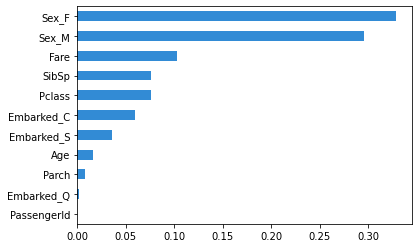

In [303]:
# GaussianNB
plots = interpreter.feature_importance.plot_feature_importance(featuresimportance(model3), ascending=False, progressbar=True)

[11/11] features ████████████████████ Time elapsed: 0 seconds

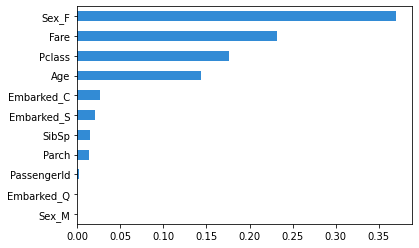

In [307]:
# DT
plots = interpreter.feature_importance.plot_feature_importance(featuresimportance(model9), ascending=False, progressbar=True)

[11/11] features ████████████████████ Time elapsed: 0 seconds

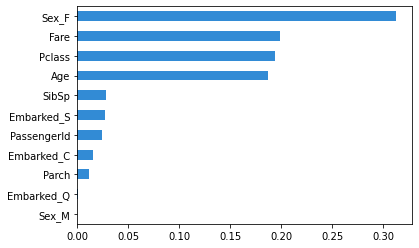

In [304]:
# Xgboost
plots = interpreter.feature_importance.plot_feature_importance(featuresimportance(model12), ascending=False, progressbar=True)

[11/11] features ████████████████████ Time elapsed: 0 seconds

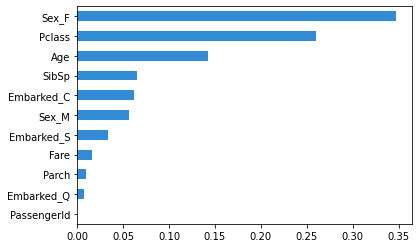

In [306]:
# MLP
plots = interpreter.feature_importance.plot_feature_importance(featuresimportance(model11), ascending=False, progressbar=True)

[11/11] features ████████████████████ Time elapsed: 0 seconds

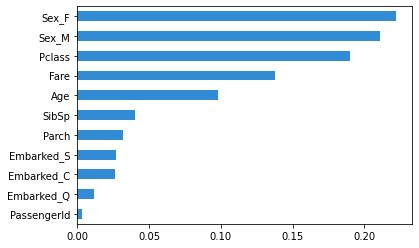

In [302]:
# RFC
plots = interpreter.feature_importance.plot_feature_importance(featuresimportance(model10), ascending=False, progressbar=True)

On voit que le genre est plus influant que les types de classes qui sont plus influent que l'age, etc.

[29/29] grid cells ████████████████████ Time elapsed: 0 seconds

(0.0, 1.0)

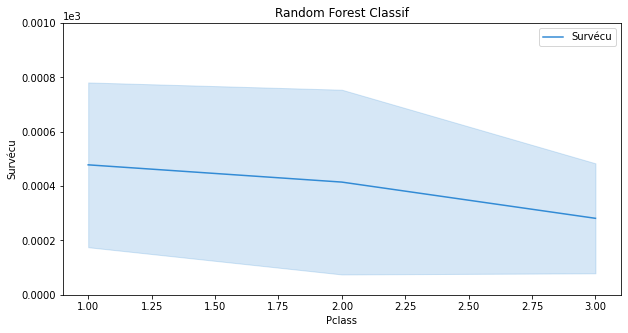

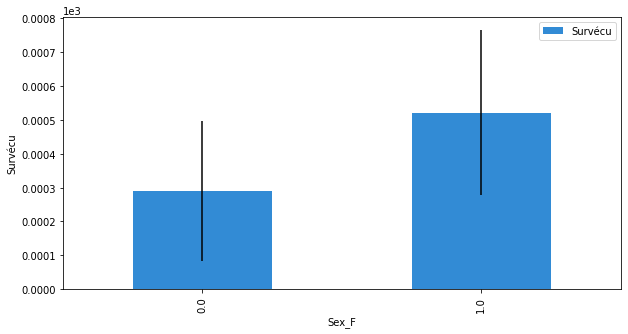

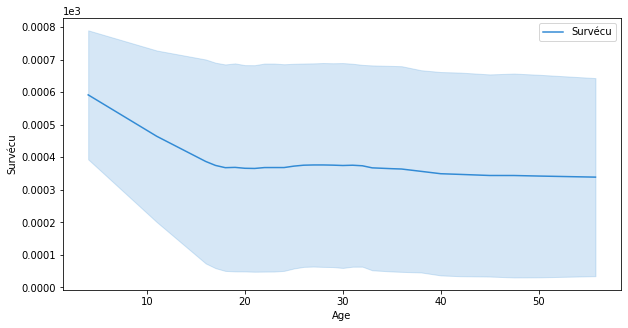

In [176]:
pyint_model = InMemoryModel(model10.predict_proba, examples=X_train, target_names=['Pas survécu', 'Survécu'])
axes_list = interpreter.partial_dependence.plot_partial_dependence(['Pclass','Sex_F','Age'],
                                                                       pyint_model, 
                                                                       grid_resolution=30, 
                                                                       with_variance=True,
                                                                       figsize = (10, 5))
ax = axes_list[0][1]
ax.set_title("Random Forest Classif")
ax.set_ylim(0, 1)

Les personnes ayant le plus survécues sont de la classe 1, ceux de la classe 3 ont le moins survécue.

Et dans la deuxième image, on peut s'apercevoir que plus de 50% des femmes du jeux d'entraînement ont survécues.

Enfin, les plus jeunes ont le plus survécues.

### Shape avec Xgboost

https://github.com/slundberg/shap#citations

In [273]:
conda install -c conda-forge shap

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/JupyterSystemEnv

  added / updated specs:
    - shap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    botocore-1.19.52           |     pyhd8ed1ab_0         4.4 MB  conda-forge
    certifi-2021.5.30          |   py36h5fab9bb_0         141 KB  conda-forge
    cloudpickle-2.0.0          |     pyhd8ed1ab_0          24 KB  conda-forge
    llvmlite-0.36.0            |   py36h05121d2_0         2.8 MB  conda-forge
    numba-0.

In [459]:
import shap

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model14)
shap_values = explainer(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


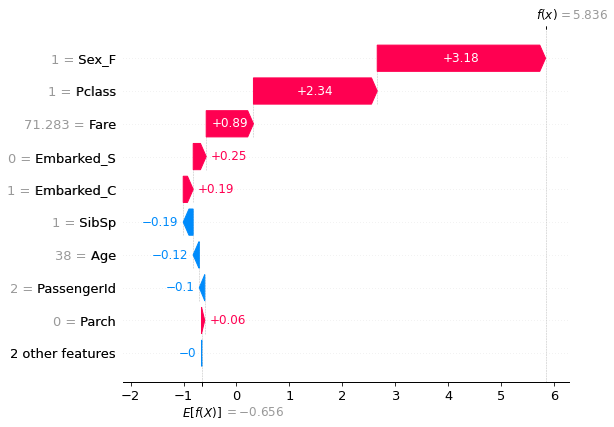

In [451]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

[11/11] features ████████████████████ Time elapsed: 0 seconds

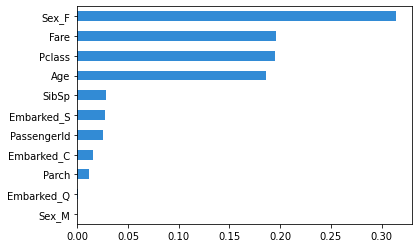

In [452]:
# Xgboost en Skater
plots = interpreter.feature_importance.plot_feature_importance(featuresimportance(model14), ascending=False, progressbar=True)

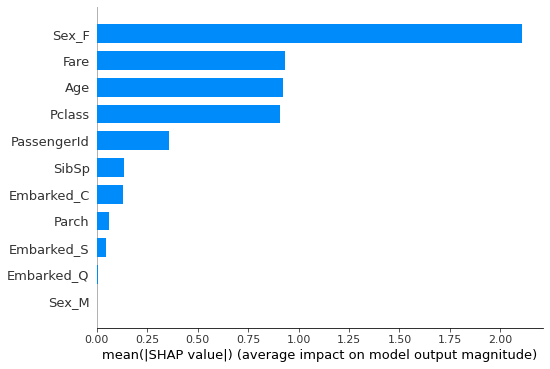

In [566]:
# Xgboost en Shape
explainer = shap.Explainer(model14, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_train, plot_type="bar")

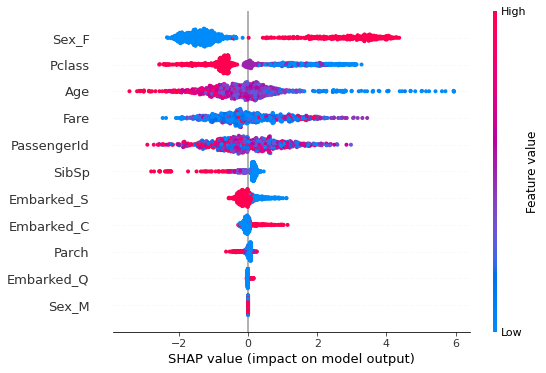

In [469]:
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

Observons avec une simple regression logistique l'impacte local des features sur la sortie des modèles :

In [623]:
# LogistiqueReg en Shape
explainer = shap.Explainer(model8, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

In [624]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], link="logit")

In [569]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test, link="logit")

# Les autres : 

#### model 10 : RFC

In [562]:
d=Prediction_ML.predire(X_test, model10)

In [563]:
Prediction_ML.getSubmissionFile(X_test, d)

Your submission was successfully saved!


In [564]:
d=pd.read_csv("data.csv")

In [565]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #  PassengerId  418 non-null    float64
 1    Survived       418 non-null    float64
dtypes: float64(2)
memory usage: 6.7 KB


###### model 12 : Xgboost

In [570]:
d=Prediction_ML.predire(X_test, model12)
Prediction_ML.getSubmissionFile(X_test, d)
d=pd.read_csv("data.csv")
d.info()

Your submission was successfully saved!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #  PassengerId  418 non-null    float64
 1    Survived       418 non-null    float64
dtypes: float64(2)
memory usage: 6.7 KB


###### model 8 : Regression Logistique avec cross validiation

In [571]:
d=Prediction_ML.predire(X_test, model8)
Prediction_ML.getSubmissionFile(X_test, d)
d=pd.read_csv("data.csv")
d.info()

Your submission was successfully saved!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #  PassengerId  418 non-null    float64
 1    Survived       418 non-null    float64
dtypes: float64(2)
memory usage: 6.7 KB


###### model 13 : SVC with kernel and c

In [572]:
d=Prediction_ML.predire(X_test, model13)
Prediction_ML.getSubmissionFile(X_test, d)
d=pd.read_csv("data.csv")
d.info()

Your submission was successfully saved!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #  PassengerId  418 non-null    float64
 1    Survived       418 non-null    float64
dtypes: float64(2)
memory usage: 6.7 KB


In [579]:
d

,# PassengerId,Survived
0,892.0,0.0
1,893.0,0.0
2,894.0,0.0
3,895.0,0.0
4,896.0,0.0
...,...,...
413,1305.0,0.0
414,1306.0,1.0
415,1307.0,0.0
416,1308.0,0.0


##### model 11 : MLP

In [576]:
d=Prediction_ML.predire(X_test, model11)
Prediction_ML.getSubmissionFile(X_test, d)
d=pd.read_csv("data.csv")
d.info()

Your submission was successfully saved!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #  PassengerId  418 non-null    float64
 1    Survived       418 non-null    float64
dtypes: float64(2)
memory usage: 6.7 KB


In [577]:
d

,# PassengerId,Survived
0,892.0,1.0
1,893.0,1.0
2,894.0,1.0
3,895.0,1.0
4,896.0,1.0
...,...,...
413,1305.0,1.0
414,1306.0,1.0
415,1307.0,0.0
416,1308.0,1.0


#### model 9 : DecisionTree

In [578]:
d=Prediction_ML.predire(X_test, model9)
Prediction_ML.getSubmissionFile(X_test, d)
d=pd.read_csv("data.csv")
d.info()

Your submission was successfully saved!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #  PassengerId  418 non-null    float64
 1    Survived       418 non-null    float64
dtypes: float64(2)
memory usage: 6.7 KB


#### model 3 : GaussianNB

In [580]:
d=Prediction_ML.predire(X_test, model3)
Prediction_ML.getSubmissionFile(X_test, d)
d=pd.read_csv("data.csv")
d.info()

Your submission was successfully saved!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #  PassengerId  418 non-null    float64
 1    Survived       418 non-null    float64
dtypes: float64(2)
memory usage: 6.7 KB


#### model 7 ; LogReg sans CV

In [581]:
d=Prediction_ML.predire(X_test, model7)
Prediction_ML.getSubmissionFile(X_test, d)
d=pd.read_csv("data.csv")
d.info()

Your submission was successfully saved!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #  PassengerId  418 non-null    float64
 1    Survived       418 non-null    float64
dtypes: float64(2)
memory usage: 6.7 KB


#### model 4 : KNN

In [582]:
d=Prediction_ML.predire(X_test, model4)
Prediction_ML.getSubmissionFile(X_test, d)
d=pd.read_csv("data.csv")
d.info()

Your submission was successfully saved!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #  PassengerId  418 non-null    float64
 1    Survived       418 non-null    float64
dtypes: float64(2)
memory usage: 6.7 KB


#### model 5 : SVM

In [585]:
d=Prediction_ML.predire(X_test, model5)
Prediction_ML.getSubmissionFile(X_test, d)
d=pd.read_csv("data.csv")
d.info()

Your submission was successfully saved!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #  PassengerId  418 non-null    float64
 1    Survived       418 non-null    float64
dtypes: float64(2)
memory usage: 6.7 KB


#### model 2 : SVC

In [586]:
d=Prediction_ML.predire(X_test, model2)
Prediction_ML.getSubmissionFile(X_test, d)
d=pd.read_csv("data.csv")
d.info()

Your submission was successfully saved!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #  PassengerId  418 non-null    float64
 1    Survived       418 non-null    float64
dtypes: float64(2)
memory usage: 6.7 KB


In [590]:
#### model 14 : xgb simple

In [591]:
d=Prediction_ML.predire(X_test, model14)
Prediction_ML.getSubmissionFile(X_test, d)
d=pd.read_csv("data.csv")
d.info()

Your submission was successfully saved!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #  PassengerId  418 non-null    float64
 1    Survived       418 non-null    float64
dtypes: float64(2)
memory usage: 6.7 KB


# Model summary for app

In [609]:
df_sum = pd.DataFrame(model_summary)
df_sum

,model,score
0,Xgboost,100.00
1,RandomForest,87.51
2,DecisionTree,86.16
3,GaussianNB,79.07
4,SVC_C0001,68.72
5,SVC,66.47
6,SVC_C10,80.65


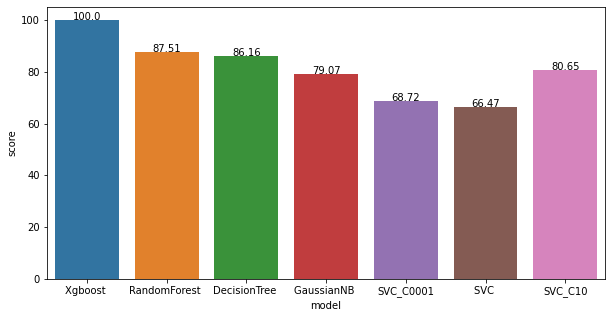

In [611]:
figure = plt.figure(figsize=(10,5))
ax = sn.barplot(y='score', x='model', data=df_sum)
# j'ajoute les valeurs
for index, row in df_sum.iterrows():
    ax.text(row.name,row.score, round(row.score,3), color='black', ha="center")

plt.show()

# Model summary after test : Kaggle verification

In [618]:
model_summary_2 = []

In [619]:
model_summary_2.append(dict(model="RandomForest", score=77.272))
model_summary_2.append(dict(model="DecisionTree", score=75.598))
model_summary_2.append(dict(model="SVM_C10", score=75.598))
model_summary_2.append(dict(model="Xgboost", score=75.119))
model_summary_2.append(dict(model="SVC et SVC_C0001)", score=75.119))
model_summary_2.append(dict(model="GaussianNB", score=37.798))

In [620]:
df_sum_2 = pd.DataFrame(model_summary_2)

In [621]:
df_sum.iloc[0,0]="RandomForest"
df_sum.iloc[0,0]="RandomForest"

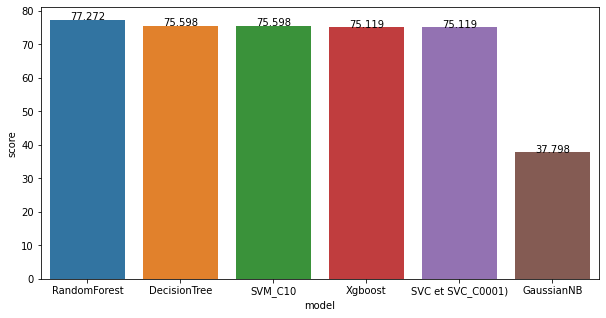

In [622]:
figure = plt.figure(figsize=(10,5))
ax = sn.barplot(y='score', x='model', data=df_sum_2)
# j'ajoute les valeurs
for index, row in df_sum_2.iterrows():
    ax.text(row.name,row.score, round(row.score,3), color='black', ha="center")

plt.show()

## Résultat en image :

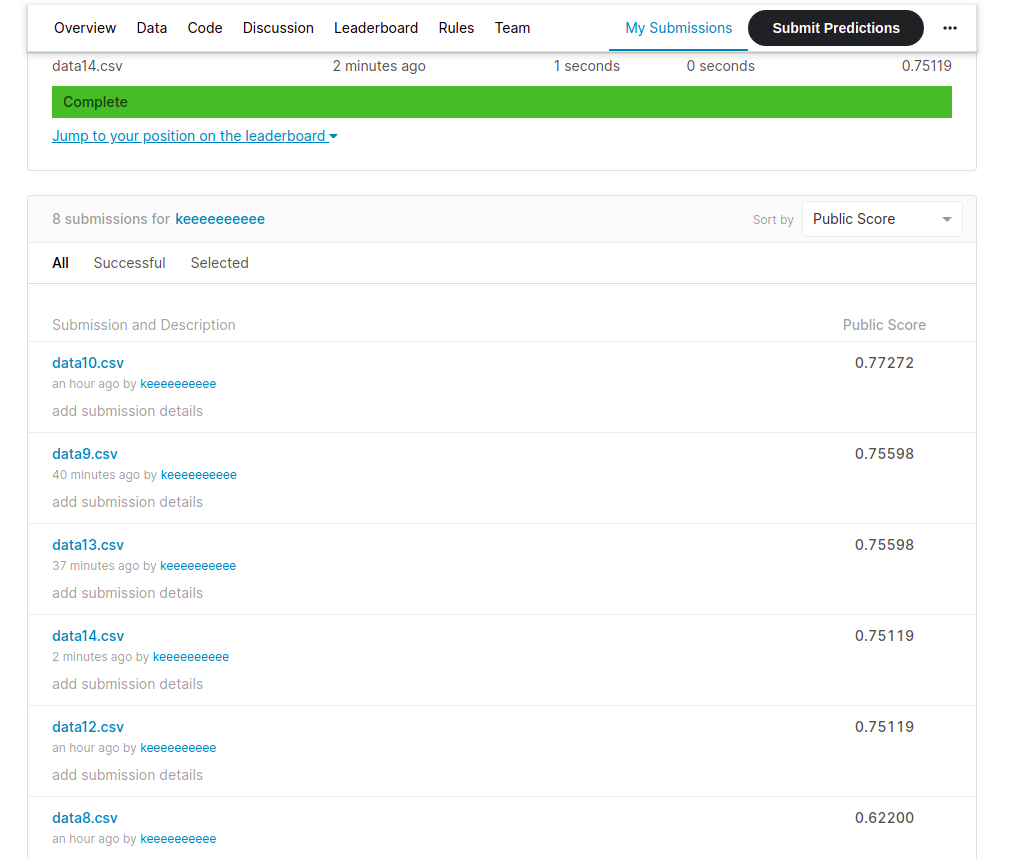

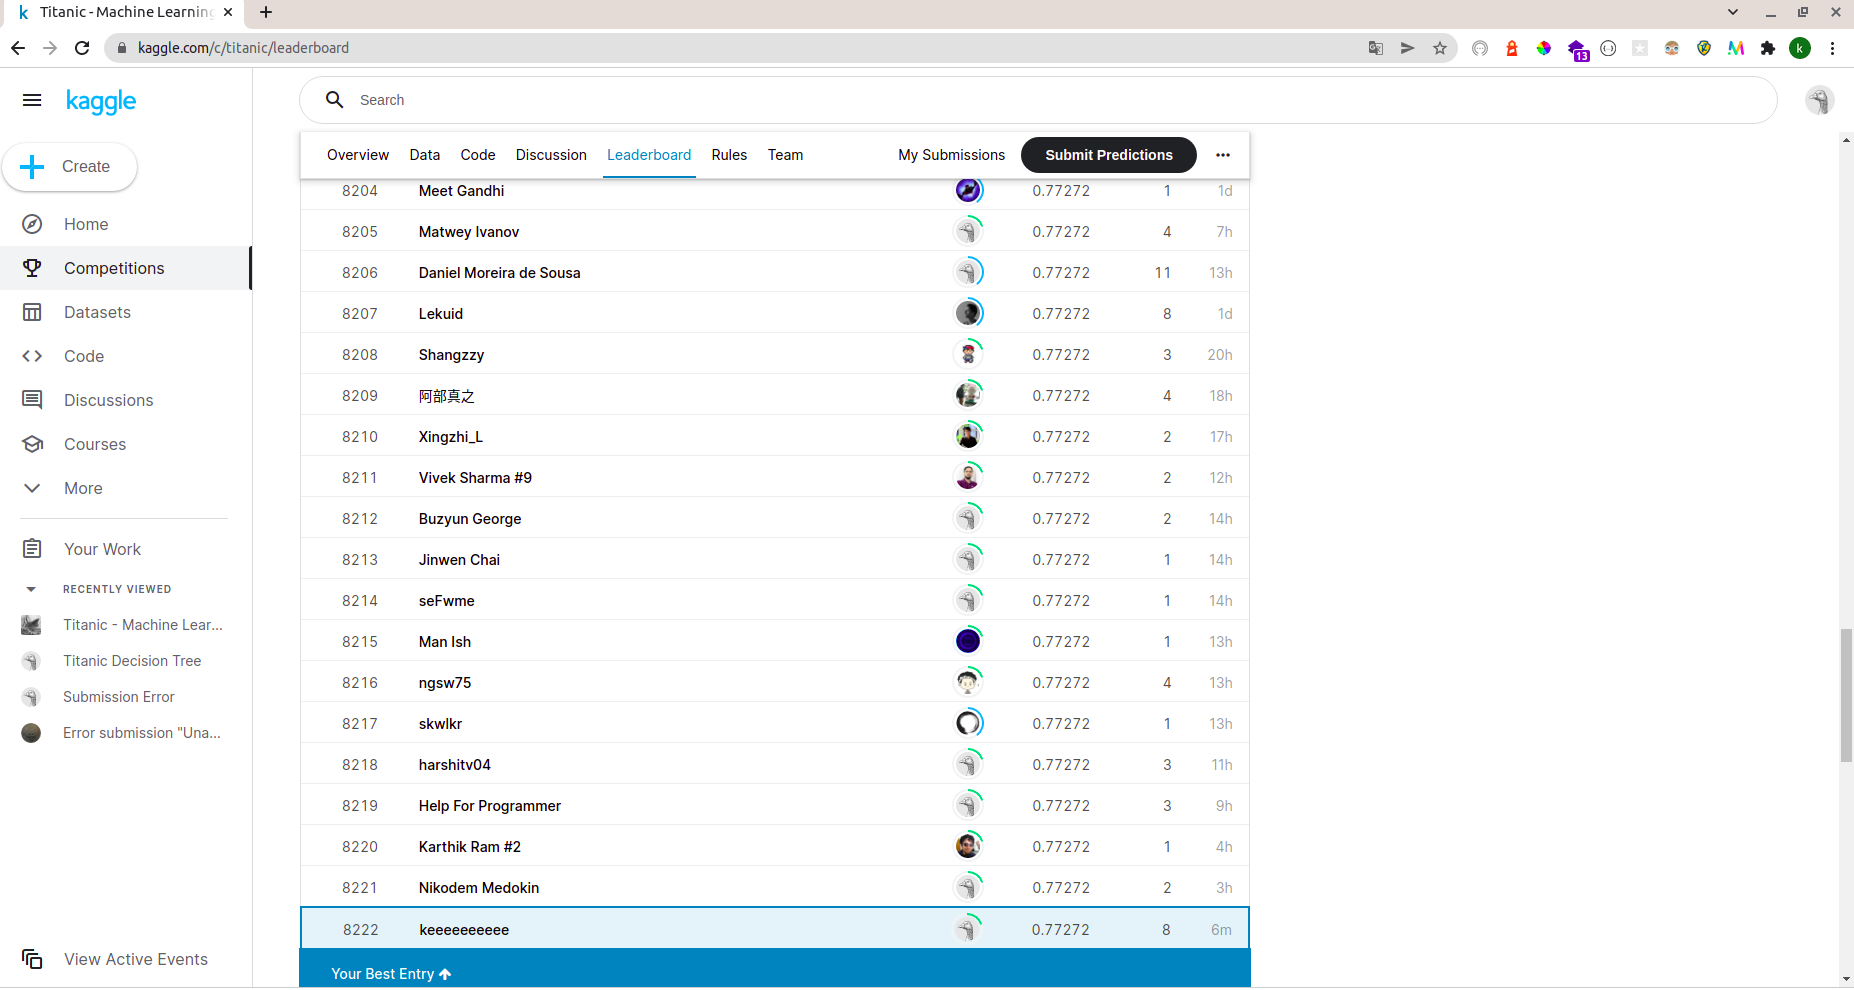